# **Reto**

In [3]:
# Importamos librerías de manejo numérico y procesamiento de datos.
import numpy as np
import pandas as pd

# Importamos scikit-learn, nuestra librería base para utilizar algoritmos de machine learning.
import sklearn

#Importamos los datasets de scikit-learn
from sklearn import datasets

# Importamos librerías de scikit-learn para manejo de regresión lineal/logística.
from sklearn import linear_model

# Importamos librerías de scikit-learn para uso de clasificación de bosque aleatorio.
from sklearn.ensemble import RandomForestClassifier

# Importamos librerías de scikit-learn para clusterización con k-means
from sklearn.cluster import KMeans

# Importamos librerías para manejo del rendimiento (performance) de nuestros modelos.
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Importamos librerías para graficar.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos el tamaño del graficado (opcional).
plt.rcParams['font.size']=15

In [4]:
# Carga del Iris dataset.
iris = datasets.load_iris()

# Imprimimos los datos.
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
# Creamos el DataFrame con los feature names.
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Creamos el DataFrame con los targets (las especies de la flor).
target = pd.DataFrame(data=iris.target, columns=['species'])

# Unimos ambos DF con concat; agregamos una nueva columna.
data = pd.concat([data, target], axis=1)

# Mezclar en orden aleatorio.
data = data.sample(frac=1, random_state=1234)

# Imprimimos los primeros registros del nuevo DataFrame.
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


## **1. Crear el DataFrame con los feature names**

- ``iris.data`` contiene las características numéricas de las flores (como el largo y ancho de los pétalos y sépalos).

- ``iris.feature_names`` son los nombres de las columnas, que describen cada característica.

- ``pd.DataFrame(...) ``convierte estos datos en un DataFrame de pandas, lo que facilita su manipulación y análisis.

Ejemplo de salida ``(data.head())``:

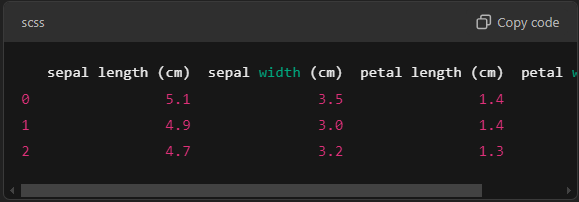

## **2. Crear el DataFrame con los targets**

``target = pd.DataFrame(data=iris.target, columns=['species'])``

- ``iris.target`` contiene los valores de las especies (0, 1 o 2, que representan las diferentes especies de Iris).

- Se convierte en un DataFrame de pandas con una sola columna llamada ``'species'``.

Ejemplo de salida ``(target.head())``:

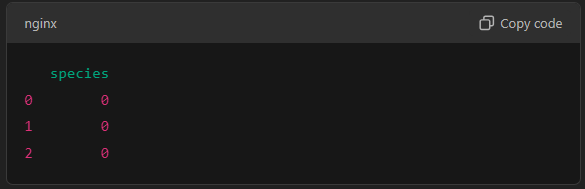

## **3. Unir los DataFrames con concat**

``data = pd.concat([data, target], axis=1)``
- ``pd.concat([...], axis=1)`` concatena los DataFrames por columnas.

- Ahora ``data`` tiene tanto las características como la columna ``'species'``.

Ejemplo ``(data.head())``:

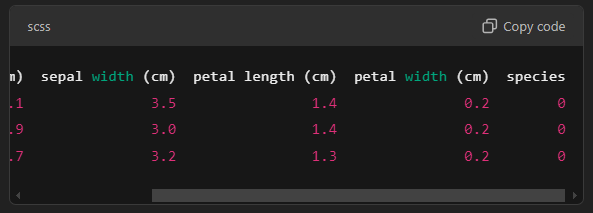

## **4. Mezclar en orden aleatorio**

``data = data.sample(frac=1, random_state=1234)``

- ``sample(frac=1)`` toma el 100% de las filas pero en orden aleatorio.

- ``random_state=1234`` asegura que los resultados sean reproducibles cada vez que se ejecute el código.

- `data.head()` Muestra las primeras 5 filas del nuevo DataFrame mezclado

## **En resumen:**
1. Se crea un DataFrame con las características ``(data)``.

2. Se crea otro DataFrame con las especies ``(target)``.

3. Se combinan ambos DataFrames ``(data = pd.concat(...))``.

4. Se mezcla el DataFrame aleatoriamente ``(sample(frac=1))``.

5. Se muestran los primeros registros ``(data.head())``.

In [6]:
# Fracción de entrenamiento 0.8.
Ntrain = int(data.shape[0] * 0.8)

# Datos de entrenamiento.
train = data.iloc[:Ntrain, :]

# Datos de prueba.
test = data.iloc[Ntrain:, :]

## **1. Definir el tamaño del conjunto de entrenamiento**

``Ntrain = int(data.shape[0] * 0.8)``

- ``data.shape[0]`` obtiene el número total de filas en ``data`` (es decir, la cantidad de muestras en el dataset).

- Se multiplica por ``0.8`` para obtener el 80% de los datos para entrenamiento.

- ``int(...)`` convierte el resultado en un número entero, ya que el índice de filas debe ser un valor entero.

🔹 Ejemplo:     
Si ``data.shape[0] = 150`` (porque el dataset de Iris tiene 150 muestras), entonces:

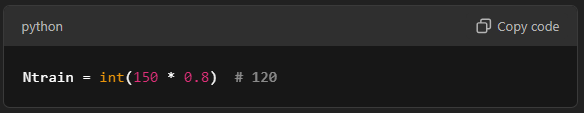

Esto significa que **las primeras 120 filas** se usarán para entrenamiento y las **30 restantes para prueba**.

## **2. Extraer datos de entrenamiento**

``train = data.iloc[:Ntrain, :]``
- ``iloc[:Ntrain, :]`` selecciona las primeras ``Ntrain`` filas de ``data``.

- ``:`` en la segunda posición significa "tomar todas las columnas".

🔹 Ejemplo:
Si ``Ntrain = 120``, entonces ``train`` contendrá las filas **0 a 119** del DataFrame.

## **3. Extraer datos de prueba**

``test = data.iloc[Ntrain:, :]``
- ``iloc[Ntrain:, :]`` selecciona desde ``Ntrain`` hasta el final del DataFrame.

- Esto toma **el 20% restante** de los datos.

🔹 Ejemplo:    
Si ``Ntrain = 120``, entonces ``test`` contendrá **las filas 120 a 149** del DataFrame.

## **🔹 Resumen del código:**
1. Se calcula cuántas filas (80%) se usarán para entrenamiento.

2. Se dividen los datos en ``train`` (las primeras ``Ntrain`` filas) y ``test`` (el resto).

3. ``train`` y ``test`` ahora contienen conjuntos separados para entrenar y evaluar un modelo.

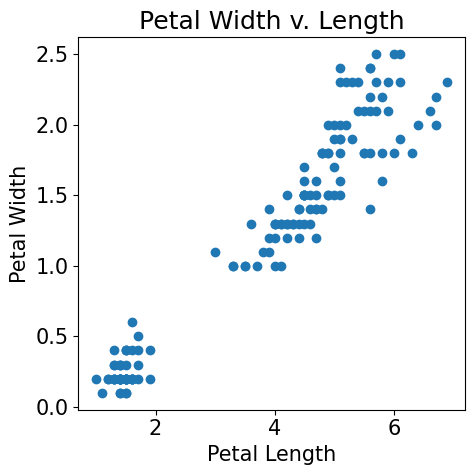

In [7]:
# Definimos variables para acceder de forma más simple a las columnas de nuestros features.
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Creamos la gráfica comparanco Petal lenght (eje x) contra Petal width (eje y)
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Width v. Length")
f.tight_layout()

## **1. Definir variables para acceder a columnas específicas**

``plength = data["petal length (cm)"]``     
``pwidth = data["petal width (cm)"]``

- Se extraen dos columnas del DataFrame ``data``:

  - ``plength`` almacena los valores de la columna **"petal length (cm)"**.

  - ``pwidth`` almacena los valores de la columna **"petal width (cm)"**.

- Esto facilita su uso en la gráfica, evitando escribir ``data["petal length (cm)"]`` cada vez.

## **2. Crear la figura y los ejes para la gráfica**

``f = plt.figure(figsize=(5,5))``     
``ax = f.add_subplot(1,1,1)``
- ``plt.figure(figsize=(5,5))`` crea una nueva figura de 5x5 pulgadas.

- ``add_subplot(1,1,1)`` agrega un único gráfico (1 fila, 1 columna, primer gráfico).

**📌 Ejemplo visual** de cómo dividir gráficos con a``dd_subplot(rows, cols, index)``:

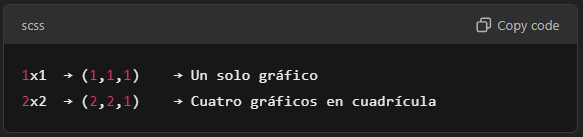

Aquí solo hay uno, así que no es necesario dividir.

## **3. Dibujar el gráfico de dispersión**

``ax.scatter(plength, pwidth)``
- ``scatter(x, y)`` crea un **diagrama de dispersión**.

- En este caso, ``plength`` (eje X) se grafica contra ``pwidth`` (eje Y).

- Cada punto representa una flor en función del largo y ancho de su pétalo.

## **4. Etiquetas y título**

``ax.set_xlabel("Petal Length")``    
``ax.set_ylabel("Petal Width")``    
``ax.set_title("Petal Width v. Length")``     
- ``set_xlabel("Petal Length")`` etiqueta el eje X.

- ``set_ylabel("Petal Width")`` etiqueta el eje Y.

- ``set_title("Petal Width v. Length")`` le da un título al gráfico.

## **5. Ajustar el diseño del gráfico**

``f.tight_layout()``
- ``tight_layout()`` **ajusta automáticamente** los márgenes para evitar que las etiquetas o títulos se sobrepongan.

## **🔹 Resumen del código:**
✅ Extrae las columnas Petal Length y Petal Width.   
✅ Crea una figura y un gráfico de dispersión.     
✅ Añade etiquetas y título.    
✅ Ajusta la distribución del gráfico.   

In [8]:
# Importar un objeto de regresión lineal de sklearn.
model_1 = linear_model.LinearRegression()

# Ajustar el modelo a tus datos.
model_1.fit(pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3])

# Imprimir los coeficientes.
print("Coef\n", model_1.coef_)

# Imprimir el sesgo o bias.
print("\n\nBias\n", model_1.intercept_)

Coef
 [0.41490802]


Bias
 -0.357589314248546


## **1️⃣ Importar el modelo de regresión lineal**

``model_1 = linear_model.LinearRegression()``
- Se **crea un objeto** de regresión lineal usando ``LinearRegression() de sklearn.linear_model``.

- Este modelo buscará **ajustar una línea recta** a los datos para hacer predicciones.

## **2️⃣ Entrenar el modelo con los datos de entrenamiento**

``model_1.fit(pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3])``
- ``train.iloc[:, 2]``: Toma la **tercera columna** de ``train`` (índice ``2``).

- ``train.iloc[:, 3]``: Toma la **cuarta columna** de ``train`` (índice ``3``).

- ``pd.DataFrame(...)``: Convierte ``train.iloc[:, 2]`` en un DataFrame, porque ``sklearn`` requiere que las **features** sean en formato de 2D (matriz de características).

**🔹 Ejemplo:**     
Si ``train.iloc[:, 2]`` representa **"Petal Length"** y ``train.iloc[:, 3]`` representa **"Petal Width"**, entonces estamos ajustando un modelo que predice el **ancho del pétalo** a partir de **su largo**.

## **3️⃣ Imprimir los coeficientes del modelo**

``print("Coef\n", model_1.coef_)``
- ``model_1.coef_`` devuelve los **coeficientes (pendientes)** del modelo.

- En una regresión lineal de la forma:

$$Y = mx+b$$

``coef_`` es el valor de ``m`` **(pendiente de la recta)**.

**🔹 Ejemplo de salida:**

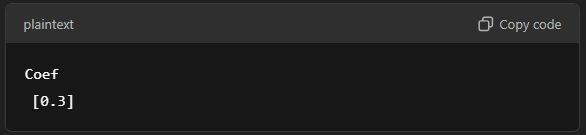

Esto significa que por **cada unidad que aumenta "Petal Length"**, el **"Petal Width"** aumenta en ``0.3``.



## **4️⃣ Imprimir el sesgo (bias/intercepto)**

``print("\n\nBias\n", model_1.intercept_)``
- ``model_1.intercept_`` es el **término independiente** ``b`` en la ecuación de la recta:

$$y=mx+b$$

- Representa **dónde la línea cruza el eje Y** cuando ``x = 0``.

**🔹 Ejemplo de salida:**

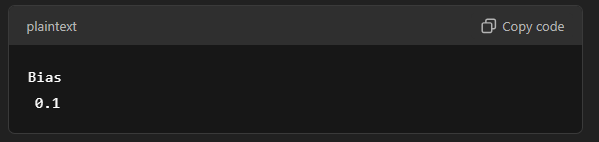

Esto significa que si ``Petal Length = 0``, entonces el **Petal Width** predicho sería ``0.1``.

## **🔹 Resumen del código:**
✅ Crea un modelo de regresión lineal.     
✅ Entrena el modelo con **Petal Length** como entrada y **Petal Width** como salida.      
✅ Muestra el coeficiente (``m``) y el bias (``b``).    

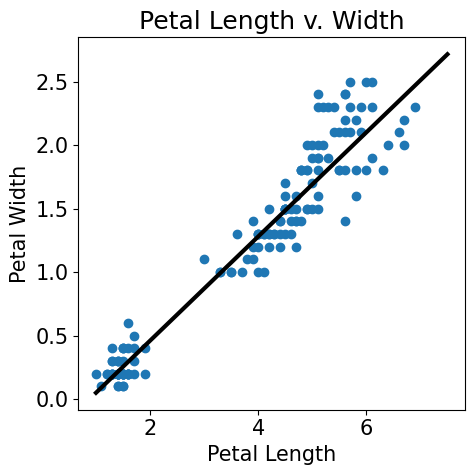

In [9]:
# Definimos variables para acceder de forma más simple a las columnas de nuestros features.
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Definimos un arreglo desde el valor mímimo del petal length hasta el máximo del petal lenght + 1, en pasos de 0.5.
xvals = np.arange(plength.min(), plength.max()+1, 0.5)

# Ecuación de nuestra regresión lineal.
yvals = 0.41*xvals - 0.36

# Gráficamos nuestra recta con los datos y nuestra ecuación.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals, yvals, 'k', linewidth=3)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()

## **1️⃣ Extraer columnas del DataFrame**

``plength = data["petal length (cm)"]``    
``pwidth = data["petal width (cm)"]``    
- Se extraen las columnas **"Petal Length"** y **"Petal Width"** del DataFrame ``data``, lo que simplifica su uso en la gráfica.

## **2️⃣ Generar un rango de valores para la predicción**

``xvals = np.arange(plength.min(), plength.max()+1, 0.5)``
- ``plength.min()`` → Valor mínimo de **"Petal Length"**.

- ``plength.max()+1`` → Valor máximo + 1 (para extender un poco el rango).

- ``0.5`` → Incremento entre valores (se generan puntos cada 0.5 unidades).

- **Objetivo**: Crear valores de entrada ``x`` para graficar la línea de regresión.

🔹 **Ejemplo de salida** (``xvals``) si el mínimo es 1 y el máximo es 6:

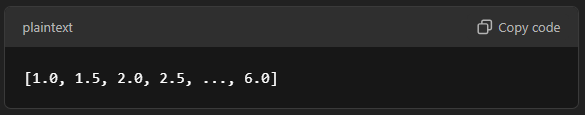

## **3️⃣ Definir la ecuación de la regresión lineal**

``yvals = 0.41*xvals - 0.36``
- Se usa la ecuación de la recta:

$$ y=mx+b$$
donde:

- ``m = 0.41`` (pendiente de la recta).

- ``b = -0.36`` (intercepto o bias).

- Esto genera valores ``yvals`` correspondientes a cada ``xvals``.

🔹 Ejemplo de cálculo para ``x = 1.5``:

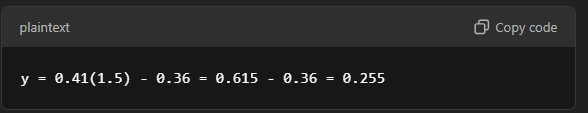


## **4️⃣ Graficar la regresión junto con los datos originales**
```python
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
# Gráfico de dispersión
ax.scatter(plength, pwidth)
# Línea de regresión en negro ('k'), grosor 3  
ax.plot(xvals, yvals, 'k', linewidth=3)  
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()
```

- ``ax.scatter(plength, pwidth)``: Grafica los puntos de datos originales.

- ``ax.plot(xvals, yvals, 'k', linewidth=3)``:

  - ``xvals`` → Valores en **X**.

  - ``yvals`` → Valores en **Y** (predichos con la regresión).

  - ``'k'`` → Color negro.

  - ``linewidth=3`` → Grosor de la línea.

#### **🔹 Visualización esperada:** 

**📌 Puntos dispersos** → Representan los datos originales.     
**📌 Línea recta negra** → Muestra la predicción de la regresión.

## **🔹 Resumen del código:**
✅ Extrae los datos de **"Petal Length"** y **"Petal Width"**.    
✅ Crea valores ``xvals`` en un rango para la predicción.     
✅ Define ``yvals`` con la ecuación de la regresión.       
✅ Grafica los puntos originales y la línea de regresión. 

## Podemos mejorar el código

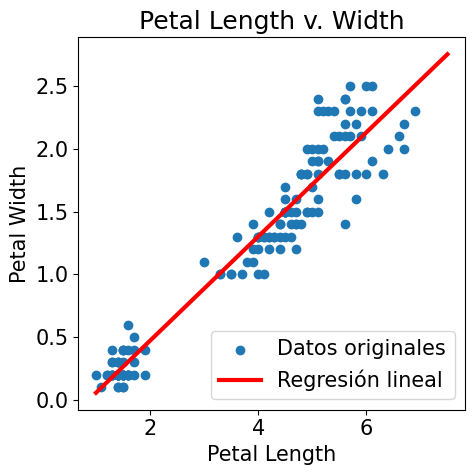

In [11]:
# Extraemos las columnas que usaremos para la regresión
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Entrenamos el modelo de regresión lineal con los datos de entrenamiento
model_1 = linear_model.LinearRegression()
model_1.fit(train[["petal length (cm)"]], train["petal width (cm)"])

# Extraemos la pendiente (coeficiente) y el intercepto (bias)
m = model_1.coef_[0]      # Pendiente de la recta
b = model_1.intercept_    # Intercepto

# Generamos los valores de x para la recta
xvals = np.arange(plength.min(), plength.max() + 1, 0.5)

# Calculamos yvals usando los coeficientes del modelo
yvals = m * xvals + b

# Graficamos los datos y la regresión
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth, label="Datos originales")  # Puntos originales
ax.plot(xvals, yvals, 'r', linewidth=3, label="Regresión lineal")  # Línea de regresión en rojo
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
ax.legend()  # Agrega una leyenda
f.tight_layout()


## **🔹 ¿Qué mejoras tiene este código?**
✅ No usa coeficientes fijos → Obtiene m y b del modelo LinearRegression.      
✅ Automatiza la ecuación → Si los datos cambian, la línea de regresión se ajusta sola.      
✅ Gráfica más clara → La línea de regresión es roja ('r') y tiene una leyenda.     

In [10]:
# Predicción con model_1 = linear_model.LinearRegression() utilizando los datos de prueba.
ypredict = model_1.predict(pd.DataFrame(test.iloc[:, 2]))

# Calculamos el MSE con los valores predichos en y.
print('MSE: %.2f'
      % mean_squared_error(pd.DataFrame(test.iloc[:, 3]), ypredict))

# Calculamos R^2 con los valores predichos en y.
print('R2: %.2f'
      % r2_score(pd.DataFrame(test.iloc[:, 3]), ypredict))

MSE: 0.04
R2: 0.94


## **🔹 Paso 1: Hacer predicciones con el modelo**
``
ypredict = model_1.predict(pd.DataFrame(test.iloc[:, 2]))
``

Aquí estamos usando el modelo de regresión lineal (``model_1``) para hacer predicciones sobre los datos de prueba.

**📌 Explicación detallada:**

- ``test.iloc[:, 2]`` → Selecciona la tercera columna de ``test``, que corresponde a **"petal length (cm)"**.

- ``pd.DataFrame(...)`` → Convierte la columna en un ``DataFrame``, ya que ``predict()`` espera este formato.

- ``model_1.predict(...)`` → Usa el modelo entrenado para predecir los valores de **"petal width (cm)"** a partir de **"petal length (cm)"**.

- ``ypredict`` → Guarda las predicciones generadas.


## **🔹 Paso 2: Calcular el Error Cuadrático Medio (MSE)**
```python
print('MSE: %.2f'
      % mean_squared_error(pd.DataFrame(test.iloc[:, 3]), ypredict))
```
      
Aquí estamos calculando el **Error Cuadrático Medio (MSE**), que mide qué tan lejos están nuestras predicciones de los valores reales.

**📌 Explicación detallada:**

- ``test.iloc[:, 3]`` → Obtiene la cuarta columna de ``test``, que es el **valor real de "petal width (cm)"**.

- ``mean_squared_error(...)`` → Calcula el **MSE**, que es la media de los cuadrados de las diferencias entre los valores reales y predichos.

- ``%.2f`` → Formatea el resultado para mostrar solo 2 decimales.

**🔎 ¿Qué significa el MSE?**

- Si el MSE es **cercano a 0**, significa que el modelo predice muy bien.

- Si el MSE es alto, el modelo tiene mucho error y podría mejorarse.



## **🔹 Paso 3: Calcular el Coeficiente de Determinación (R²)**
```python
print('R2: %.2f'
      % r2_score(pd.DataFrame(test.iloc[:, 3]), ypredict))
```    
Aquí calculamos **el coeficiente de determinación (R²)**, que nos dice qué tan bien se ajusta la regresión a los datos.

**📌 Explicación detallada:**

- ``r2_score(...)`` → Calcula el **R²**, que mide la proporción de la variabilidad explicada por el modelo.

- ``%.2f`` → Formatea el resultado para mostrar solo 2 decimales.

**🔎 ¿Qué significa el R²?**

- **R² ≈ 1** → El modelo es **excelente**, explica casi toda la variabilidad.

- **R² ≈ 0** → El modelo **no explica nada**, las predicciones son aleatorias.

- **R² negativo** → El modelo es **peor que adivinar el promedio.** 😬

## **✨ Resumen final**
**📌 ¿Qué hace este código?**     
1️⃣ Predice los valores de "petal width (cm)" en los datos de prueba.    
2️⃣ Calcula el MSE → Cuánto error tiene el modelo.     
3️⃣ Calcula el R² → Qué tan bien explica el modelo los datos.    

**📌 ¿Cómo interpretar los resultados?**

- **Si MSE es bajo y R² es cercano a 1** → El modelo es bueno. ✅

- **Si MSE es alto y R² es bajo** → El modelo tiene problemas. ❌

In [12]:
# Preparamos los datos de entrenamiento y prueba en x y y.
# La última columna es la etiqueta de la especie..
xtrain = train.iloc[:, :-1] # input, training
ytrain = train.iloc[:, -1] # output, training
xtest = test.iloc[:, :-1] # input, test
ytest = test.iloc[:, -1] # output, test

# Configuramos la regresión logística con el método de regresión logística de linear_model.
model_2 = linear_model.LogisticRegression()

# Ajustamos el modelo con los datos de entrenamiento.
model_2.fit(xtrain, ytrain)

LogisticRegression()

Este bloque de código está preparando los datos para entrenar un modelo de **Regresión Logística** con ``sklearn``. Veamos qué hace cada parte:

## **🔹 Paso 1: Separar las variables de entrada (X) y salida (Y)**
```python
xtrain = train.iloc[:, :-1]  # input, training
ytrain = train.iloc[:, -1]   # output, training
xtest = test.iloc[:, :-1]    # input, test
ytest = test.iloc[:, -1]     # output, test
```    
**📌 Explicación:**

- ``train.iloc[:, :-1]`` → Toma **todas las columnas excepto la última** (características de la flor).

- ``train.iloc[:, -1]`` → Toma **solo la última columna**, que es **la especie de la flor** (etiqueta o clase).

- Lo mismo se hace con ``test`` para obtener ``xtest`` y ``ytest``.

**🔎 Ejemplo de cómo quedan los datos:**

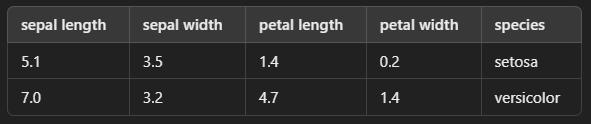

**Aquí:**

- ``xtrain`` tiene **todas las columnas excepto "species".**

- ``ytrain`` tiene **solo la columna "species".**

## **🔹 Paso 2: Crear el modelo de Regresión Logística**
``model_2 = linear_model.LogisticRegression()``

**📌 Explicación:**

- ``linear_model.LogisticRegression()`` → Crea un modelo de **clasificación** basado en Regresión Logística.

**🔎 ¿Por qué usamos regresión logística?**

- Se usa cuando la variable objetivo (``y``) es **categórica** (en este caso, el tipo de flor).

- Permite clasificar observaciones en **diferentes clases** basándose en probabilidades.



## **🔹 Paso 3: Entrenar el modelo con los datos de entrenamiento**
``model_2.fit(xtrain, ytrain)``

**📌 Explicación:**

- ``model_2.fit(xtrain, ytrain)`` → Ajusta el modelo a los datos de entrenamiento.

- Encuentra los **coeficientes** y el ``sesgo`` para separar correctamente las especies de flores.

## **✨ Resumen**
**📌 ¿Qué hace este código?**     
1️⃣ Separa las características (``X``) y la etiqueta (``Y``).     
2️⃣ Crea un modelo de **Regresión Logística**.     
3️⃣ **Entrena** el modelo con los datos de entrenamiento (``xtrain``, ``ytrain``).

**📌 ¿Qué podemos hacer después?**    
Ahora podríamos **evaluar** qué tan bien clasifica el modelo con los datos de prueba (``xtest``, ``ytest``).

In [13]:
# Hacer predicciones con el conjunto de prueba.
ypred = model_2.predict(xtest)

# Probamos el accuracy del modelo generado
print("Testing accuracy =", accuracy_score(ytest, ypred))

Testing accuracy = 1.0


Este bloque de código realiza la **predicción** y la **evaluación** de un modelo de **Regresión Logística** que ya fue entrenado. Vamos a desglosarlo paso a paso:

## **🔹 Paso 1: Hacer predicciones con el conjunto de prueba**

``ypred = model_2.predict(xtest)``

**📌 Explicación:**

- ``model_2.predict(xtest)`` → Utiliza el modelo entrenado (``model_2``) para hacer **predicciones** sobre los datos de prueba (``xtest``).

- ``xtest`` contiene las **características de la flor** (como "petal length", "petal width", etc.), y el modelo devuelve una **predicción de las especies** de las flores (por ejemplo, "setosa", "versicolor", "virginica").

- ``ypred`` guarda las **predicciones** generadas por el modelo para cada instancia de ``xtest``.



## **🔹 Paso 2: Evaluar la precisión del modelo**

``print("Testing accuracy =", accuracy_score(ytest, ypred))``

**📌 Explicación:**

- ``accuracy_score(ytest, ypred)`` → Calcula la **precisión** del modelo, que es la fracción de **predicciones correctas**.

- ``ytest`` → Los valores reales de las especies en el conjunto de prueba.

- ``ypred`` → Las predicciones realizadas por el modelo.

- ``accuracy_score`` compara estos dos vectores y calcula el porcentaje de veces que el modelo acertó.

- ``print("Testing accuracy =", ...)`` → Muestra el resultado en la consola, indicando qué tan bien el modelo logró predecir las especies en el conjunto de prueba.

**🔎 ¿Qué es la precisión?**     

La precisión se calcula como:
$$\text{Precisión} = \frac{\text{Predicciones correctas}}{\text{Total de Predicciones}} × 100$$

## **✨ Resumen**
**📌 ¿Qué hace este código?**

1️⃣ **Realiza predicciones** usando el modelo de Regresión Logística sobre el conjunto de prueba (``xtest``).  
2️⃣ **Evalúa la precisión** del modelo al comparar las predicciones (``ypred``) con los valores reales (``ytest``).     
3️⃣ Imprime el **porcentaje de precisión** en el conjunto de prueba.

**📌 ¿Qué podemos hacer después?**     
Si la precisión es alta, entonces el modelo funciona bien. Si no es tan alta, podríamos probar otros modelos o mejorar la calidad de los datos.

La **precisión (accuracy)** está en un rango de valores entre **0 y 1**, o si se expresa en porcentaje, entre **0% y 100%**.

**📌 Interpretación de la Precisión**
- **Cercano a 1 (o 100%)** → El modelo es muy preciso y casi todas las predicciones son correctas.

- **Cercano a 0 (o 0%)** → El modelo no tiene precisión y está fallando en la mayoría de las predicciones.

- **50% (0.5)** → Equivalente a predecir al azar (como lanzar una moneda).

- **70%-90%** → Un modelo aceptable, dependiendo del problema.

- **95%-100%** → Podría indicar un excelente modelo o posible sobreajuste (overfitting).

**📌 ¿Qué precisión es buena?**

Depende del problema:

- **Clasificación simple** (ej. spam o no spam) → Se espera **>80%**.

- **Problemas complejos** (ej. reconocimiento de imágenes) → A veces, **> 70%** ya es bueno.

- **Modelos biomédicos o financieros** → Se busca **>90%**, pero también se analiza **sensibilidad** y **especificidad**.

In [14]:
# Un ejemplo de la matriz de confusión con sklearn
#Importamos el método de matriz de confusión desde sklearn
from sklearn.metrics import confusion_matrix

#Aplicamos la matriz a nuestros valores de testing y los valores de predicción generados.
confusion_matrix(ytest, ypred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 12]])

**📌 Explicación del Código: Matriz de Confusión**    

Este bloque de código genera una **matriz de confusión** para evaluar el rendimiento del modelo de clasificación.

# **🔹 Paso a Paso**
## **1️⃣ Importación de la función de matriz de confusión**

``from sklearn.metrics import confusion_matrix``

- ``confusion_matrix`` es una función de ``sklearn.metrics`` que permite evaluar el desempeño de un modelo de clasificación.

## **2️⃣ Cálculo de la matriz de confusión**

``confusion_matrix(ytest, ypred)``    
- Se comparan las etiquetas reales (``ytest``) con las **predicciones** (``ypred``).

- Devuelve una matriz cuadrada donde:

    - **Filas**: Representan las clases reales.
  
    - **Columnas**: Representan las predicciones del modelo.
  
    - Cada celda indica cuántos datos fueron correctamente o incorrectamente clasificados.

### **📌 ¿Cómo interpretar la matriz de confusión?**
Para el dataset **Iris**, que tiene 3 clases (tres especies de flores), la matriz será de **3x3**.

Ejemplo de salida:
```lua
[[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]
 ```

Donde:

- **Fila 1 (Setosa)** → [19, 0, 0]

    - 19 setosas fueron clasificadas correctamente.

    - 0 fueron clasificadas como otra especie.

- **Fila 2 (Versicolor)** → [0, 15, 1]

    - 15 versicolores fueron clasificadas correctamente.

    - 1 fue mal clasificada.

- **Fila 3 (Virginica)** → [0, 0, 15]

    - 15 virginicas fueron clasificadas correctamente.

    - 0 fueron mal clasificadas.

**📌 Si la matriz tiene valores fuera de la diagonal principal, significa que el modelo ha cometido errores de clasificación.**

## **📌 ¿Cómo usar esta información?**
- **Si la matriz es diagonal** (sin valores fuera de la diagonal), el modelo tiene 100% de precisión.

- **Si hay errores**, podemos mejorar el modelo ajustando hiperparámetros o usando más datos.

In [15]:
# Creamos el clasificador
clf = RandomForestClassifier(n_estimators=3)

# Entrenamos el modelo
clf.fit(xtrain, ytrain)

# Generamos predicción
y_pred=clf.predict(xtest)

# Probamos el modelo con accuracy
print("Testing accuracy =", accuracy_score(ytest, ypred))

Testing accuracy = 1.0


## **📌 Explicación del Código: Random Forest Classifier 🌳🌲**
Este código implementa un **clasificador de bosques aleatorios** (``RandomForestClassifier``) para clasificar las especies de flores en el dataset **Iris**.

# **🔹 Paso a Paso**
## **1️⃣ Creación del clasificador Random Forest**

``clf = RandomForestClassifier(n_estimators=3)``    
- Se crea un modelo de **Random Forest** con **3 árboles de decisión** (``n_estimators=3``).

- **¿Qué es Random Forest?**

  - Es un conjunto de múltiples **árboles de decisión**.

  - Cada árbol hace una predicción y el modelo toma la decisión final por **votación mayoritaria**.



## **2️⃣ Entrenamiento del modelo**

``clf.fit(xtrain, ytrain)``     
- Ajusta el modelo con los **datos de entrenamiento** (``xtrain``, ``ytrain``).

- Aprende patrones en los datos para clasificar nuevas observaciones.



## **3️⃣ Predicción con datos de prueba**

``y_pred = clf.predict(xtest)``
- Utiliza el modelo entrenado para **predecir las especies** en los datos de prueba (``xtest``).

- ``y_pred`` almacena las etiquetas predichas para cada flor.



## **4️⃣ Cálculo del Accuracy**

``print("Testing accuracy =", accuracy_score(ytest, ypred))``
- Compara las etiquetas reales (``ytest``) con las predicciones (``y_pred``).

- Devuelve el **porcentaje de aciertos** del modelo en el conjunto de prueba.

## **📌 Resumen del funcionamiento**
🔹 **Random Forest** genera varios árboles de decisión y toma la predicción más frecuente.     
🔹 **Ventaja:** Reduce el sobreajuste en comparación con un solo árbol de decisión.     
🔹 **Limitación:** Con pocos árboles (``n_estimators=3``), la precisión puede ser menor.   

**📌 ¿Quieres mejorar la precisión?**

- **Aumenta** ``n_estimators`` (ejemplo: ``n_estimators=100``).

- **Usa técnicas de preprocesamiento** como normalización de datos.

In [17]:
# Inicializamos el modelo KMeans.
k2model = KMeans(n_clusters=2, random_state=42)

# Ajustar todos los puntos de datos EXCEPTO para la especie.
k2model.fit(data[["petal length (cm)", "petal width (cm)"]])

# Calculamos e imprimimos la inercia desde el modelo de Kmeans.
print("Inertia =", k2model.inertia_)

# Cálculamos e imprimimos la posición de los clústers.
print("Centroids (x, y) =\n", k2model.cluster_centers_)

Inertia = 86.39021984551397
Centroids (x, y) =
 [[4.92525253 1.68181818]
 [1.49215686 0.2627451 ]]


Este bloque de código aplica el algoritmo de **K-Means** para agrupar los datos del conjunto ``iris`` en **dos clústers** usando las características *petal length* y *petal width*.

# **Explicación línea por línea:**
## **1️⃣ Inicializamos el modelo K-Means**

``k2model = KMeans(n_clusters=2, random_state=42)``
- ``n_clusters=2``: Define que queremos **2 grupos** o clústers.

- ``random_state=42``: Asegura que los resultados sean **reproducibles** en futuras ejecuciones.

## **2️⃣ Entrenamos el modelo con los datos**

``k2model.fit(data[["petal length (cm)", "petal width (cm)"]])``
- Se usa **solo** *petal length* y *petal width* para agrupar los datos (sin la especie).

- ``fit()`` detecta patrones y agrupa los puntos en **dos clústers**.

## **3️⃣ Calculamos la inercia**

``print("Inertia =", k2model.inertia_)``
- **Inercia**: Es la suma de las distancias cuadradas entre los puntos y sus respectivos centroides.

- **Menos inercia → mejores clústers**, porque los puntos están más cerca de sus centroides.

## **4️⃣ Calculamos la posición de los centroides**

``print("Centroids (x, y) =\n", k2model.cluster_centers_)``
- ``cluster_centers_`` devuelve las **coordenadas** de los dos **centroides**.

- Estos representan el "punto medio" de cada clúster.

## **📌 Resumen**
Este código **agrupa** las flores del dataset en **dos clústers** utilizando solo dos características (*petal length* y *petal width*), calcula la calidad del agrupamiento con la **inercia**, y muestra la posición de los **centroides**. 🚀

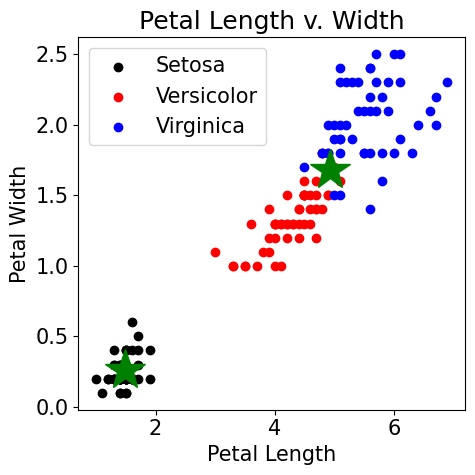

In [19]:
# Graficamos los datos con la línea para setosa.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)

# Setosa
ax.scatter(data[data.iloc[:, -1]==0]["petal length (cm)"],
           data[data.iloc[:, -1]==0]["petal width (cm)"],
           c='k')

# Versicolor
ax.scatter(data[data.iloc[:, -1]==1]["petal length (cm)"],
           data[data.iloc[:, -1]==1]["petal width (cm)"],
           c='r')

# Virginica
ax.scatter(data[data.iloc[:, -1]==2]["petal length (cm)"],
           data[data.iloc[:, -1]==2]["petal width (cm)"],
           c='b')

ax.legend(["Setosa", "Versicolor", "Virginica"])

# Graficamos los centroides de los clústers (output en Petal Length x Petal Width)
ax.plot(k2model.cluster_centers_[:,0],
        k2model.cluster_centers_[:,1],
        "g*", markersize=30)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()

### **✨ Explicación del código: Visualización de especies y centroides de K-Means**
Este código genera un **gráfico de dispersión** de las flores del dataset **Iris**, coloreando cada especie y mostrando los centroides de los clústers encontrados con **K-Means**.

# **🔹 Paso a paso del código:**
## **1️⃣ Se crea la figura y los ejes**

``f = plt.figure(figsize=(5,5))  ``      
``ax = f.add_subplot(1,1,1)``

🔹 Se crea una figura de **5x5** y un eje de gráfico dentro de ella.

## **2️⃣ Se grafican las tres especies del dataset**
Cada especie se filtra y se grafica con un color diferente en base a la columna de etiquetas (``species``).

```python
# Setosa (color negro)
ax.scatter(data[data.iloc[:, -1]==0]["petal length (cm)"],
           data[data.iloc[:, -1]==0]["petal width (cm)"],
           c='k')

# Versicolor (color rojo)
ax.scatter(data[data.iloc[:, -1]==1]["petal length (cm)"],
           data[data.iloc[:, -1]==1]["petal width (cm)"],
           c='r')

# Virginica (color azul)
ax.scatter(data[data.iloc[:, -1]==2]["petal length (cm)"],
           data[data.iloc[:, -1]==2]["petal width (cm)"],
           c='b')
```

**📌 Explicación:**

- Se usa ``data.iloc[:, -1]`` para acceder a la **última columna** del DataFrame (que contiene la especie).

- Se comparan los valores con **0**, **1**, **2** para filtrar cada especie:

    - **0 → Setosa** (``c='k'`` → negro)

    - **1 → Versicolor** (``c='r'`` → rojo)

    - **2 → Virginica** (``c='b'`` → azul)

- Luego, se grafica cada especie con ``ax.scatter()``, utilizando sus valores de **Petal Length (x)** y **Petal Width (y)**.

## **3️⃣ Se añade la leyenda**

``ax.legend(["Setosa", "Versicolor", "Virginica"])``    

✔️ Se agrega una leyenda con los nombres de las especies para identificar los colores en la gráfica.

## **4️⃣ Se grafican los centroides de K-Means**

``ax.plot(k2model.cluster_centers_[:,0],``       
``        k2model.cluster_centers_[:,1],``        
``        "g*", markersize=30)``   

**📌 Explicación:**    

- ``k2model.cluster_centers_[:,0]`` → Extrae la coordenada x de los centroides (**Petal Length**).

- ``k2model.cluster_centers_[:,1]`` → Extrae la coordenada y de los centroides (**Petal Width**).

- ``"g*"`` → Usa estrellas verdes (``g`` = green, ``*`` = estrella) para marcar los centroides.

- ``markersize=30`` → Ajusta el tamaño de los marcadores para que sean **bien visibles**.

## **5️⃣ Se configuran los ejes y título**

``ax.set_xlabel("Petal Length")``     
``ax.set_ylabel("Petal Width")``      
``ax.set_title("Petal Length v. Width")``      
``f.tight_layout()``     

✔️ Se agregan etiquetas a los ejes x (**Longitud del Pétalo**) y y (**Ancho del Pétalo**).     
✔️ Se coloca un título **"Petal Length v. Width"**.
✔️ ``f.tight_layout()`` optimiza el diseño para evitar que las etiquetas se salgan del área de la imagen.

## **🎯 ¿Qué se obtiene con este código?**
**📊 Un gráfico que muestra:**      
✅ Cada flor del dataset **Iris** clasificada por especie (Setosa, Versicolor, Virginica).      
✅ Los **centroides de los clústers** calculados con **K-Means**.      
✅ Una visualización clara de cómo están distribuidas las flores según sus características de pétalos.      